**классификатор изображений (цифры MNIST) LeNet**

Евгений Борисов borisov.e@solarl.ru

## Библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D 
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils 

In [3]:
np.random.seed(1671)

## Данные

In [4]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
NB_CLASSES = len(set(y_train))
NB_CLASSES

10

In [7]:
# # tensorflow
# from tensorflow.keras import backend as K
# K.set_image_dim_ordering("th")

In [8]:
# consider them as float and normalize

X_train = X_train / 255.0
X_test  = X_test  / 255.0

X_train = X_train[:, :, :, np.newaxis].astype('float32')
X_test = X_test[:, :, :, np.newaxis].astype('float32')

In [9]:
# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_train, NB_CLASSES)
y_test = utils.to_categorical(y_test, NB_CLASSES)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [11]:
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = (IMG_ROWS,IMG_COLS,1)

## Модель

In [12]:
# initialize the optimizer and model
# model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)

model = Sequential()
# CONV => RELU => POOL
model.add(Convolution2D(20, kernel_size=5, padding="same", input_shape=INPUT_SHAPE))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(rate=0.7))
# CONV => RELU => POOL
model.add(Convolution2D(50, kernel_size=5, padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(rate=0.7))
# Flatten => RELU layers
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))
model.add(Dropout(rate=0.7))
# a softmax classifier
model.add(Dense(NB_CLASSES))
model.add(Activation("softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
__________

In [14]:
# model.compile(loss="categorical_crossentropy", optimizer='rmsprop',metrics=["accuracy"])
model.compile(loss="categorical_crossentropy", optimizer='sgd',metrics=["accuracy"])

## Обучение

In [15]:
# network and training
NB_EPOCH = 100
BATCH_SIZE = 128## Обучени
VERBOSE = 1
VALIDATION_SPLIT=0.2

In [16]:
%%time

history = model.fit(X_train, y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=NB_EPOCH, 
                    verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
48000/48000 [==============================] - 27s 554us/sample - loss: 2.2756 - acc: 0.1440 - val_loss: 2.1845 - val_acc: 0.7097
Epoch 2/100
48000/48000 [==============================] - 26s 542us/sample - loss: 1.8677 - acc: 0.3483 - val_loss: 1.1764 - val_acc: 0.8245
Epoch 3/100
48000/48000 [==============================] - 26s 538us/sample - loss: 1.1785 - acc: 0.6199 - val_loss: 0.6322 - val_acc: 0.8777
Epoch 4/100
48000/48000 [==============================] - 26s 543us/sample - loss: 0.8680 - acc: 0.7240 - val_loss: 0.4257 - val_acc: 0.9056
Epoch 5/100
48000/48000 [==============================] - 26s 538us/sample - loss: 0.7011 - acc: 0.7773 - val_loss: 0.3342 - val_acc: 0.9244
Epoch 6/100
48000/48000 [==============================] - 26s 538us/sample - loss: 0.6049 - acc: 0.8078 - val_loss: 0.2783 - val_acc: 0.9345
Epoch 7/100
48000/48000 [=========================

## Тестирование

In [17]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 2s 200us/sample - loss: 0.0450 - acc: 0.9873

Test score: 0.04499613302731886
Test accuracy: 0.9873


---

In [18]:
# import matplotlib.pyplot as plt

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

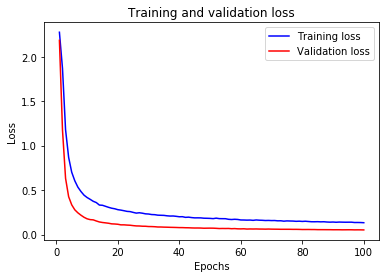

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

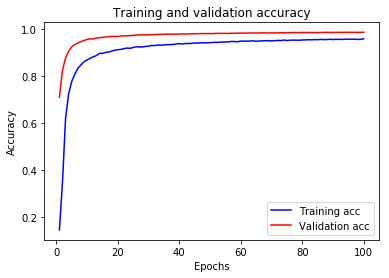

In [21]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib

print('tensorflow:', tf.__version__)
print('keras:', keras.__version__)

if tf.test.is_built_with_cuda():
    print('GPU devices:\n  ',
        [ [x.name, x.physical_device_desc] 
          for x in device_lib.list_local_devices() 
          if x.device_type == 'GPU' ]
    )
    print('default GPU device:', tf.test.gpu_device_name() )

else:
    print('no GPU device found')
    

tensorflow: 1.13.1
keras: 2.2.4-tf
GPU devices:
   [['/device:GPU:0', 'device: 0, name: GeForce GT 730, pci bus id: 0000:01:00.0, compute capability: 3.5']]
default GPU device: /device:GPU:0
